In [1]:
import networkx as nx
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [62]:
#parameter define
n=1000
p=1e-2
m=n*(n-1)*p/2
k=(n-1)*p
d=k/(n-1)

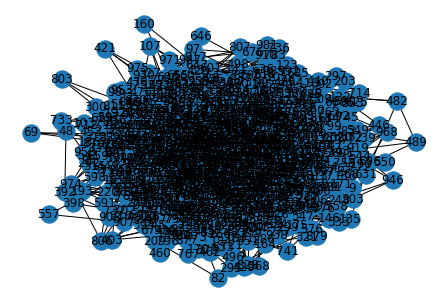

4990

In [63]:
I= nx.erdos_renyi_graph(n,p)
nx.draw(I, with_labels=True) 
plt.show()

I.number_of_edges()

<BarContainer object of 19 artists>

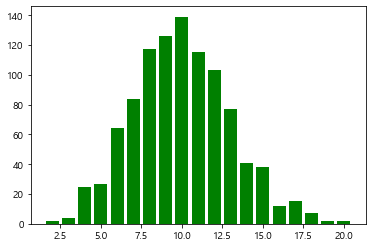

In [64]:
from collections import Counter
degree_sequence = sorted([d for n, d in I.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="g")


In [51]:
print(nx.average_clustering(I))
print(nx.diameter(I))


1.0
1


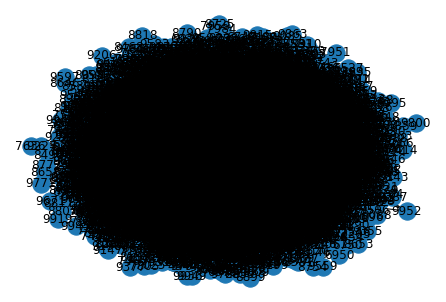

39984

In [120]:
B = nx.barabasi_albert_graph(n=10000, m=4, seed=4)
nx.draw(B, with_labels=True) 
plt.show()

B.number_of_edges()

In [100]:
def k_distrib(graph=B, scale='lin', colour='#40a6d1', alpha=.8, expct_lo=1, expct_hi=10, expct_const=1):
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    # X-axis and y-axis values
    x = []
    y_tmp = []
    # loop for all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree+1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i/num_nodes for i in y_tmp]
    # Plot the graph
    deg, = plt.plot(x, y,label='Degree distribution',linewidth=0, marker='o',markersize=8, color=colour, alpha=alpha)
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        # add theoretical distribution line k^-3
        w = [a for a in range(expct_lo,expct_hi)]
        z = []
        for i in w:
            x = (i**-3) * expct_const # set line's length and fit intercept
            z.append(x)

        plt.plot(w,z, 'k-', color='#7f7f7f')
    else:
        plt.title('Degree distribution (linear scale)')


    plt.ylabel('P(k)')
    plt.xlabel('k')
    plt.show()

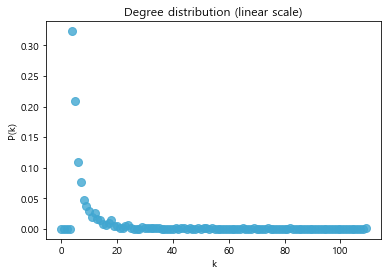

In [101]:
k_distrib(graph=B,colour='#40a6d1',alpha=.8)

In [121]:
print(nx.average_clustering(B))
print(nx.diameter(B))

0.005689475006841548
6


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

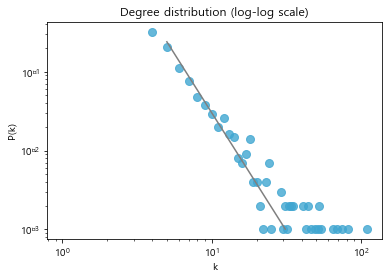

In [118]:
k_distrib(graph=B,colour='#40a6d1', scale='log',alpha=.8, expct_lo=5, expct_hi=32, expct_const=30)

In [182]:
n=1000
p=1e-3

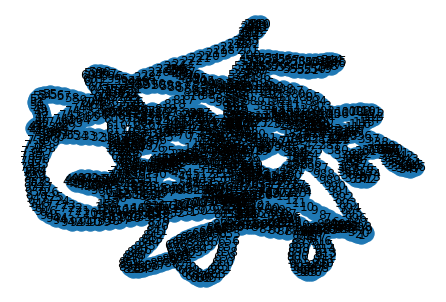

0.49920000000000003
232


In [183]:
N = nx.newman_watts_strogatz_graph(n=n, k=4,p=p)
nx.shell_layout(N)
nx.draw(N, with_labels=True) 
plt.show()

N.number_of_edges()
print(nx.average_clustering(N))
print(nx.diameter(N))

<BarContainer object of 2 artists>

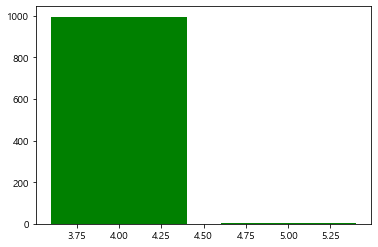

In [184]:
from collections import Counter
degree_sequence = sorted([d for n, d in N.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="g")
